<a href="https://colab.research.google.com/github/AkhilaGuptaP/Capstone/blob/main/MyIndividual_FinalDraft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Mounting Drive**

In [1]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Importing Libraries**

In [32]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# To filter and suppress warning messages issued by code. The purpose is to prevent warning messages from cluttering the console or logs.
import warnings
warnings.filterwarnings('ignore')


### **Loading Dataset**

In [3]:
# Loading the Dataset

df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets_2/Airbnb NYC 2019.csv')

# Dataset's First Look
df.head().T


,0,1,2,3,4
id,2539,2595,3647,3831,5022
name,Clean & quiet apt home by the park,Skylit Midtown Castle,THE VILLAGE OF HARLEM....NEW YORK !,Cozy Entire Floor of Brownstone,Entire Apt: Spacious Studio/Loft by central park
host_id,2787,2845,4632,4869,7192
host_name,John,Jennifer,Elisabeth,LisaRoxanne,Laura
neighbourhood_group,Brooklyn,Manhattan,Manhattan,Brooklyn,Manhattan
neighbourhood,Kensington,Midtown,Harlem,Clinton Hill,East Harlem
latitude,40.64749,40.75362,40.80902,40.68514,40.79851
longitude,-73.97237,-73.98377,-73.9419,-73.95976,-73.94399
room_type,Private room,Entire home/apt,Private room,Entire home/apt,Entire home/apt
price,149,225,150,89,80


In [4]:
#Displaying the shape of dataset
print(f'Original dataset has {df.shape[0]} Row & {df.shape[1]} Columns.')

Original dataset has 48895 Row & 16 Columns.


In [5]:
#Statistics summary of numerical columns

df.describe(include='number')


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


From above statistics we understood that minimum price is Zero, hence understaing count of zero price rows and handling it

In [6]:
#Displaying rows with zero price
df[df['price']==0]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
23161,18750597,"Huge Brooklyn Brownstone Living, Close to it all.",8993084,Kimberly,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,2018-01-06,0.05,4,28
25433,20333471,★Hostel Style Room | Ideal Traveling Buddies★,131697576,Anisha,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,2019-06-24,2.56,4,127
25634,20523843,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",15787004,Martial Loft,Brooklyn,Bushwick,40.69467,-73.92433,Private room,0,2,16,2019-05-18,0.71,5,0
25753,20608117,"Sunny, Quiet Room in Greenpoint",1641537,Lauren,Brooklyn,Greenpoint,40.72462,-73.94072,Private room,0,2,12,2017-10-27,0.53,2,0
25778,20624541,Modern apartment in the heart of Williamsburg,10132166,Aymeric,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,2018-01-02,0.15,1,73
25794,20639628,Spacious comfortable master bedroom with nice ...,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68173,-73.91342,Private room,0,1,93,2019-06-15,4.28,6,176
25795,20639792,Contemporary bedroom in brownstone with nice view,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68279,-73.91170,Private room,0,1,95,2019-06-21,4.37,6,232
25796,20639914,Cozy yet spacious private brownstone bedroom,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,Private room,0,1,95,2019-06-23,4.35,6,222
26259,20933849,the best you can find,13709292,Qiuchi,Manhattan,Murray Hill,40.75091,-73.97597,Entire home/apt,0,3,0,NaN,NaN,1,0
26841,21291569,Coliving in Brooklyn! Modern design / Shared room,101970559,Sergii,Brooklyn,Bushwick,40.69211,-73.90670,Shared room,0,30,2,2019-06-22,0.11,6,333


In [7]:
#Dropping the rows with price=0
df=df[df['price']!=0]

In [8]:
#Summary of null values
df.isna().sum()


id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10051
reviews_per_month                 10051
calculated_host_listings_count        0
availability_365                      0
dtype: int64

### **Data Cleaning**

Dropping the Duplicate rows

In [9]:
df.drop_duplicates(inplace=True)

Handling Null Values

In [10]:
#Filling null values of both columns- reviews_per_month and last_review with 0
df['reviews_per_month'].fillna(0,inplace=True)
df['last_review'].fillna(0,inplace=True)

#Filling missing values of columns name, host_name as Unknown
columns_to_fill = ['name', 'host_name']
df[columns_to_fill]=df[columns_to_fill].fillna('Unknown')


Renaming columns appropriately

In [11]:
df.rename(columns={'id':'Listing_id','name':'Listing_name'},inplace=True)

Summary of null values after data cleaning

In [12]:
df.isna().sum()

Listing_id                        0
Listing_name                      0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

DataFrame after cleaning

In [13]:
df.head(20)

,Listing_id,Listing_name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [ ]:

df.head().T

,0,1,2,3,4
Listing_id,2539,2595,3647,3831,5022
Listing_name,Clean & quiet apt home by the park,Skylit Midtown Castle,THE VILLAGE OF HARLEM....NEW YORK !,Cozy Entire Floor of Brownstone,Entire Apt: Spacious Studio/Loft by central park
host_id,2787,2845,4632,4869,7192
host_name,John,Jennifer,Elisabeth,LisaRoxanne,Laura
neighbourhood_group,Brooklyn,Manhattan,Manhattan,Brooklyn,Manhattan
neighbourhood,Kensington,Midtown,Harlem,Clinton Hill,East Harlem
latitude,40.64749,40.75362,40.80902,40.68514,40.79851
longitude,-73.97237,-73.98377,-73.9419,-73.95976,-73.94399
room_type,Private room,Entire home/apt,Private room,Entire home/apt,Entire home/apt
price,149,225,150,89,80


# **Popular neighbourhod based on reviews**

In [14]:
#Grouping by neighbourhood_group and finidng total number of reviews per each neighbourhood group
reviews_grp=df.groupby('neighbourhood_group')['number_of_reviews'].sum().reset_index()
reviews_grp


,neighbourhood_group,number_of_reviews
0,Bronx,28316
1,Brooklyn,486252
2,Manhattan,454569
3,Queens,156950
4,Staten Island,11541


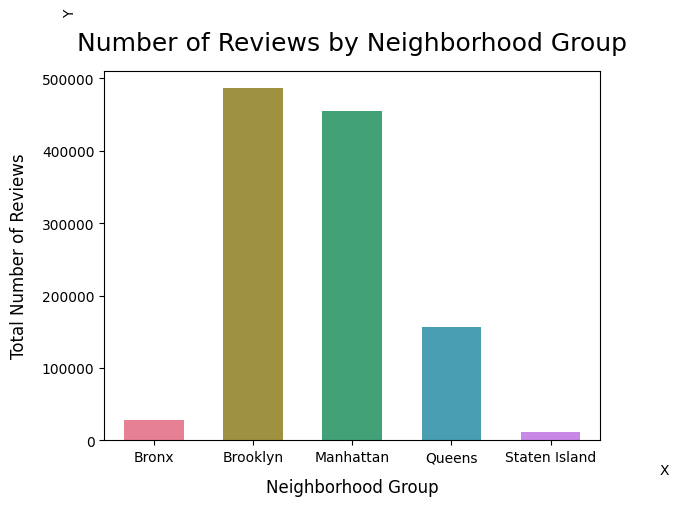

In [33]:
#Creating subplot
fig,ax=plt.subplots()

#Creating a barplot
sns.barplot(data=reviews_grp,x='neighbourhood_group',y='number_of_reviews',palette='husl',width=0.6)


#Adding labels and title to the plot
ax.set_xlabel('Neighborhood Group',fontsize=12,labelpad=10)
ax.set_ylabel("Total Number of Reviews",fontsize=12,labelpad=10)
ax.set_title('Number of Reviews by Neighborhood Group',fontsize=18,pad=15)

#Customizing the text size and alignmnet
fig.text(1,0.04,'X',ha='center')
fig.text(0.06,1,'Y',va='center',rotation='vertical')

#Show the plot
plt.show()


### Observations

**Reason**

Barplot is the effective way to visually represent and compare the numeric values across different variables.It gives a very quick visual comparison between total number of reviews across neighbourhod group where the height of the bar represents the total count of reviews per each neighbourhood group.

**Insights**

Brooklyn and Manhattan seems have relatively high reviews and very popular compared to other three neighbour groups. Queens being moderately popular while bronx , Staten Island seems least popular.


**Impact**

Brooklyn and Manhattan are the popular neighbourhood groups based on reviews and having properties in these regions would make profits.



________________________________________________________________________________________________________________________________________________________________________________________________



__________________________________________________________________________________________________________________________________________________________________________________________

#**Availability_365 across different neighbourhood group with respect to room type**

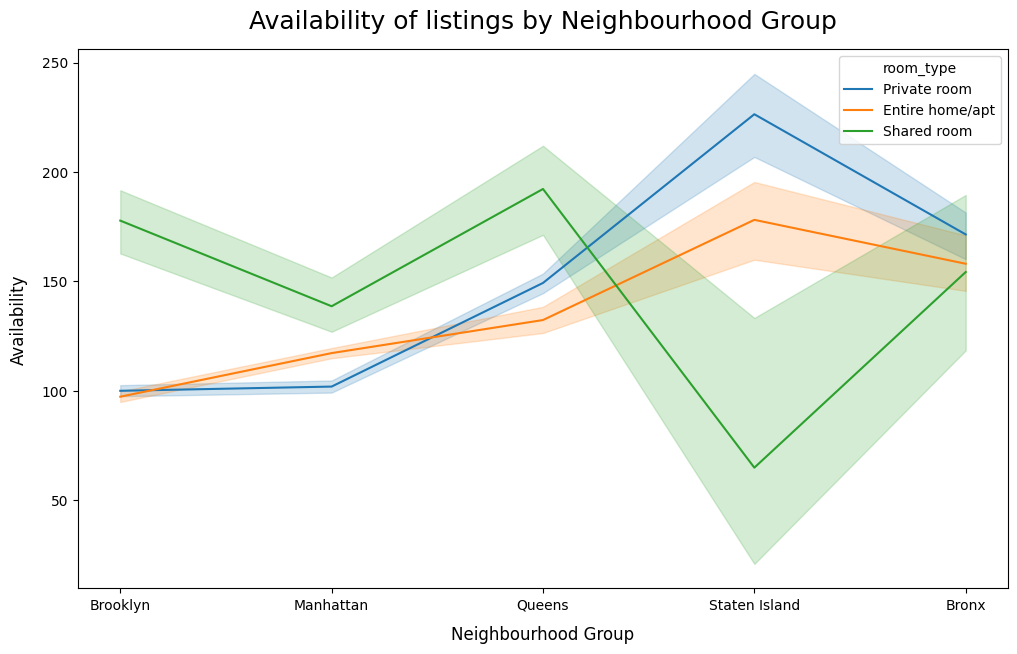

In [16]:
#Increasing figure size
plt.figure(figsize=(12,7))

#Creating lineplot
sns.lineplot(data=df, x='neighbourhood_group', y='availability_365', hue='room_type')

#Adding labels and title to the plot
plt.xlabel('Neighbourhood Group',fontsize=12,labelpad=10)
plt.ylabel("Availability",fontsize=12,labelpad=10)
plt.title('Availability of listings by Neighbourhood Group',fontsize=18,pad=15)

#Show the plot
plt.show()


### Observations

**Reason**

Great plot to compare and distinguish between two variable and with additional hue parament we can analyze multiple lines on the same plot.

**Insights**

From the plot Staten Island seems to be busiest for shared rooms , while Private rooms and Entire home are most available.
Brooklyn and Manhattan have more availability for shared rooms while Provate rooms nad Entore home are popular and busiest, even Queens have similar availability.
Bronx seems to have same availability for all types of room.

**Impact**

Having two popular kinds of room- Entire Home/Private room in Brooklyn or Manhattan can gain profits.




________________________________________________________________________________________________________________________________________________________________________________________________



__________________________________________________________________________________________________________________________________________________________________________________________

# **Room Type Proportion**

In [19]:
#Finding each room type count in the dataset
room_type=df['room_type'].value_counts().reset_index()
room_type.rename(columns={'index':'Room Type','room_type':'Number of listings'},inplace=True)
room_type

,Room Type,Number of listings
0,Entire home/apt,25407
1,Private room,22319
2,Shared room,1158


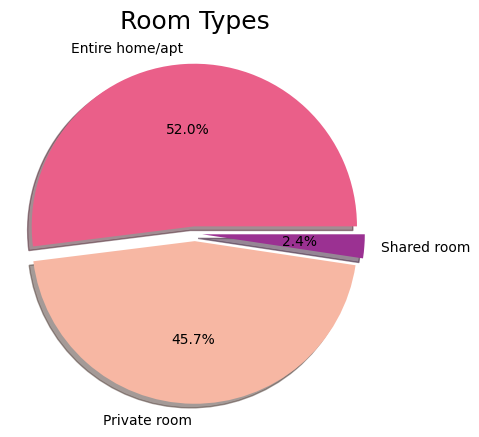

In [20]:
#Creating the pieplot for room types with explode and custom colors
explode_range = [0.05, 0.05, 0.05]
my_colors=['#EA5F89','#F7B7A3','#9B3192']
plt.pie(room_type['Number of listings'],labels=room_type['Room Type'],explode=explode_range,autopct='%1.1f%%',shadow=True,colors=my_colors,radius=1.1)

#Addding the title to plot
plt.title('Room Types',fontsize=18,pad=15)

#Show plot
plt.show()

### Observations
**Reason** -

Pie chart is best in visually representing the proportions/distribution of different category and allows us to have a clear distinction between categories.The size of the proportion represents the values making it easy to compare.

**Insights** -

Majority of the listings of Airbnb are Entire Home/Apartment and Private room , while Entire Home being the first and Private room type being the second with very slight difference.And there are relatively very few lisiting for Shared room and this seems to be least preferred accomodation type.

**Business Impact** -

Data suggests that majority of accomodation type available on AirBnb is Entire Home/Apartment and Private room.Since these two types of room are most commonly available, as per business it is important to follow certain pricing strategies to sustain in high competition for these two room types in the market.



________________________________________________________________________________________________________________________________________________________________________________________________



__________________________________________________________________________________________________________________________________________________________________________________________

  # **Pricing of each neighbourhood group per each Room type**

In [21]:
#Grouping dataset by columns neigbourhood group , room type and finiding the average price per each neighbourhood group and respective room type
pricing_by_neighbourhood=df.groupby(['neighbourhood_group','room_type'])['price'].mean().reset_index()
pricing_by_neighbourhood


,neighbourhood_group,room_type,price
0,Bronx,Entire home/apt,127.506596
1,Bronx,Private room,66.890937
2,Bronx,Shared room,59.800000
3,Brooklyn,Entire home/apt,178.346202
4,Brooklyn,Private room,76.545428
5,Brooklyn,Shared room,50.773723
6,Manhattan,Entire home/apt,249.257994
7,Manhattan,Private room,116.776622
8,Manhattan,Shared room,88.977083
9,Queens,Entire home/apt,147.050573


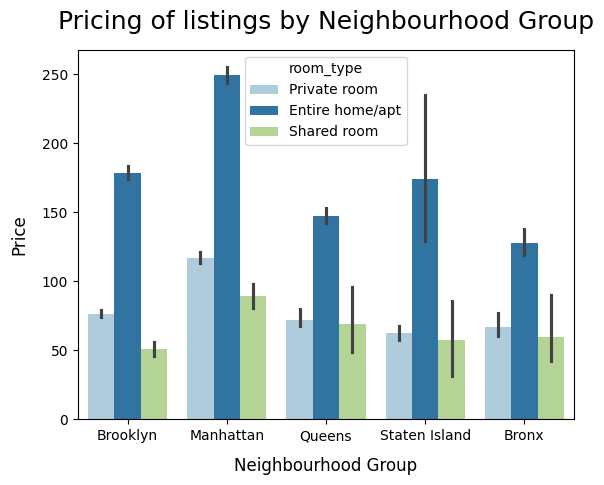

In [22]:
#Creating barplot
sns.barplot(data=df,x='neighbourhood_group',y='price',hue='room_type',palette='Paired')


#Adding labels and title to the plot
plt.xlabel('Neighbourhood Group',fontsize=12,labelpad=10)
plt.ylabel("Price",fontsize=12,labelpad=10)
plt.title('Pricing of listings by Neighbourhood Group',fontsize=18,pad=15)

#Show the plot
plt.show()


### Observations
**Reason**-

A bar plot is the best type of visualization to compare numerical variables across different categories.And adding hue allows us to have additional third dimenesion to the plot which represents category through different colors.

**Insights**-

Manhattan's pricing is the highest across all neighbourhood groups also Manhattan's pricing being the highest across all the categories of the roomtypes- Entire home,Private,shared.
Also Entire Home type pricing is the highest , second highest is Private and shared room seems to be the least expensive.

**Business Impact**-

Entire Home/apartment earns highest for all neighbourhood groups and Manhattan being the best and popular place that will earn the highest.
Investing in Entire Apartment type rooms in Manhattan could gain high profit.



________________________________________________________________________________________________________________________________________________________________________________________________



__________________________________________________________________________________________________________________________________________________________________________________________

# **Latitude and Longitude mapping**

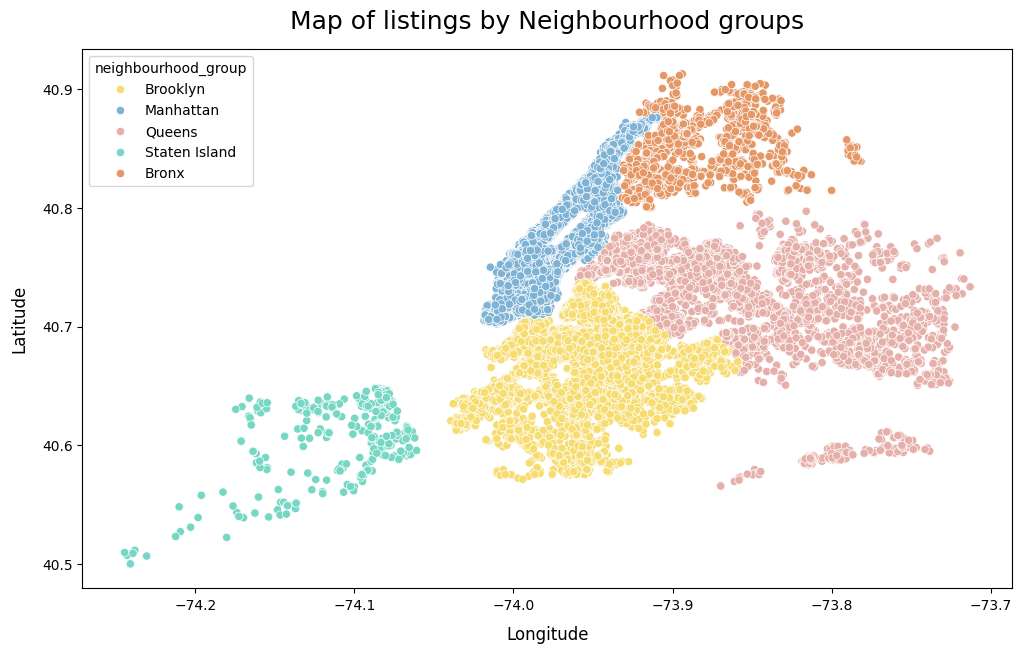

In [23]:
#Increasing figure size and adding custom color list
plt.figure(figsize=(12,7))
my_colors=['#F7DC6F','#7FB3D5','#E6B0AA','#76D7C4','#E59866']

#Creating scatterplot using latitude and longitude with hue as neighbourhood group
sns.scatterplot(data=df,x='longitude',y='latitude',hue='neighbourhood_group',palette=my_colors)

#Adding labels and title to the plot
plt.xlabel('Longitude',fontsize=12,labelpad=10)
plt.ylabel("Latitude",fontsize=12,labelpad=10)
plt.title('Map of listings by Neighbourhood groups',fontsize=18,pad=15)

#SHow the plot
plt.show()

### **Lattitude and Longitude mapping with respect to availability of each neighbourhood_group**

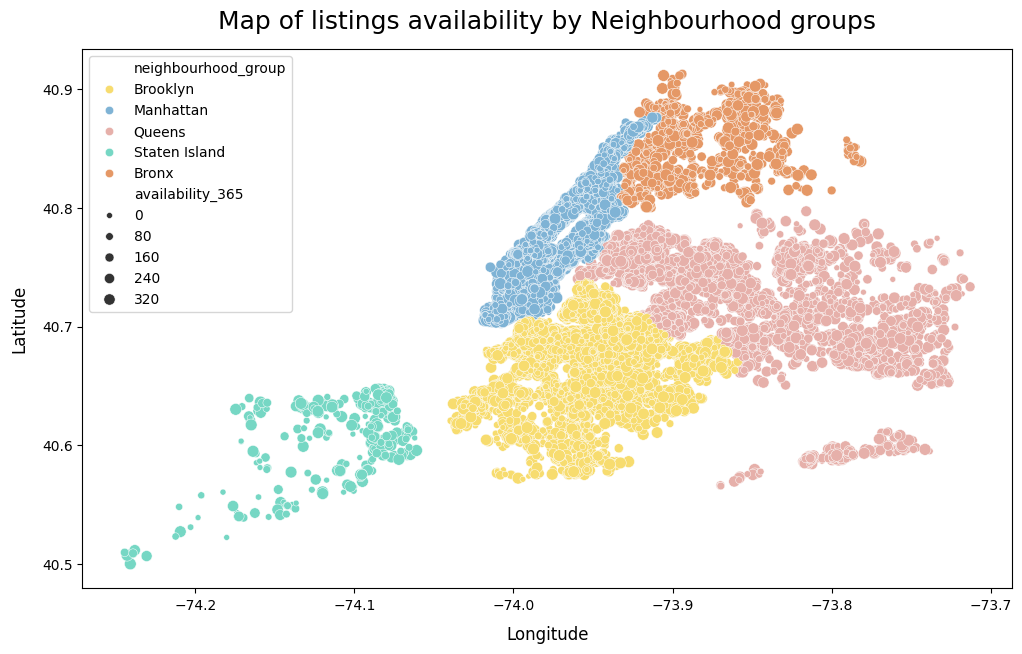

In [24]:
# Adjusting or increasing the figure size
plt.figure(figsize=(12,7))

# Adding custom list for colors of the plot
my_colors=['#F7DC6F','#7FB3D5','#E6B0AA','#76D7C4','#E59866']

#Creating scatterplot using latitude and longitude with hue as neighbourhood group with additional parameter size which represents availability_365
sns.scatterplot(data=df,x='longitude',y='latitude',hue='neighbourhood_group',palette=my_colors,size='availability_365')

#Adding labels and title to the plot
plt.xlabel('Longitude',fontsize=12,labelpad=10)
plt.ylabel("Latitude",fontsize=12,labelpad=10)
plt.title('Map of listings availability by Neighbourhood groups',fontsize=18,pad=15)

#Show the plot
plt.show()




### Observations

**Reasons-**

Scatter Plot is best to plot latitude, longitude and to visualize or analyse the pattern.And additional hue parameter allows us to distinguish the neighbourhood groups while size can be an additional parameter for other numerical mesaure.Here size parameter is used to represent availability.


**Insights-**

Bronx and Staten Island seems to be more available, even Queens have more availability.
Manhattan and Brooklyn have least availability and they seems to be busiest.Both neighbourhoods also seems to be the popular and priciest.


**Business Impacts-**

Having properties in Manhattan and Brooklyn would earn more being the busiest neighbourhoods, at the same time could be little expensive to invest in that neighbourhood.
To keep businees busy in areas Bronx,Staten Island and Queen they should introduce offers with pricing in general or less pricing with an extended stay etc.




________________________________________________________________________________________________________________________________________________________________________________________________



__________________________________________________________________________________________________________________________________________________________________________________________

### **Coorelation between min nyts, no of reviews,price and availability 365**

In [25]:
df_nyts=df[['minimum_nights','number_of_reviews','price','availability_365']]

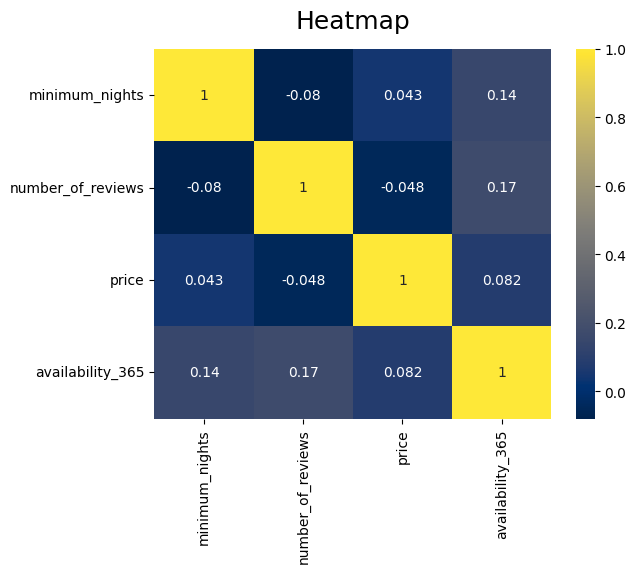

In [26]:
#Creating a heatmap with minimum_nights, number_reviews, price, availablity_365 to see coorealtion between them
sns.heatmap(data=df_nyts.corr(),annot=True,cmap='cividis')

#Adding title to the plot
plt.title('Heatmap',fontsize=18,pad=15)

#Show plot
plt.show()


### Observations

**Reason**

Heatmaps provide a best visualization to understand coorelation between numerical variables


**Insights**

Minimum nights, number ,price and availability 365 doesnot seems have relation and infact have negative correction.

________________________________________________________________________________________________________________________________________________________________________________________________



__________________________________________________________________________________________________________________________________________________________________________________________

# **Popular hosts per each room type**

In [27]:
#Creating seperate dataframe for each room type
roomtype_1=df.groupby('room_type').get_group('Private room')
roomtype_2=df.groupby('room_type').get_group('Entire home/apt')
roomtype_3=df.groupby('room_type').get_group('Shared room')

In [28]:
#Finding top 5 hosts of Room type1 - Private room based on number of reviews
hosts_roomtype_1=roomtype_1.groupby('host_name')['number_of_reviews'].sum().reset_index()
top_hosts_roomtype_1=hosts_roomtype_1.sort_values('number_of_reviews',ascending=False).head()
top_hosts_roomtype_1

,host_name,number_of_reviews
4200,Michael,4372
2965,John,4030
1396,David,3552
4113,Maya,2880
3305,Kevin,2834


In [29]:
#Finding top hosts of Room type 2- Entire home/apt based on total number of reviews
hosts_roomtype_2=roomtype_2.groupby('host_name')['number_of_reviews'].sum().reset_index()
top_hosts_roomtype_2=hosts_roomtype_2.sort_values('number_of_reviews',ascending=False).head()
top_hosts_roomtype_2

,host_name,number_of_reviews
4584,Michael,6598
1557,David,4542
2966,Jason,3841
210,Alex,3586
2006,Eric,3304


In [30]:
#Finding top hosts of Room type 3- Shared room based on total number of reviews
hosts_roomtype_3=roomtype_3.groupby('host_name')['number_of_reviews'].sum().reset_index()
top_hosts_roomtype_3=hosts_roomtype_3.sort_values('number_of_reviews',ascending=False).head()
top_hosts_roomtype_3

,host_name,number_of_reviews
422,Nora,528
333,Lloyd,454
453,R.Henry,368
188,Gúney,349
3,Abraham,344


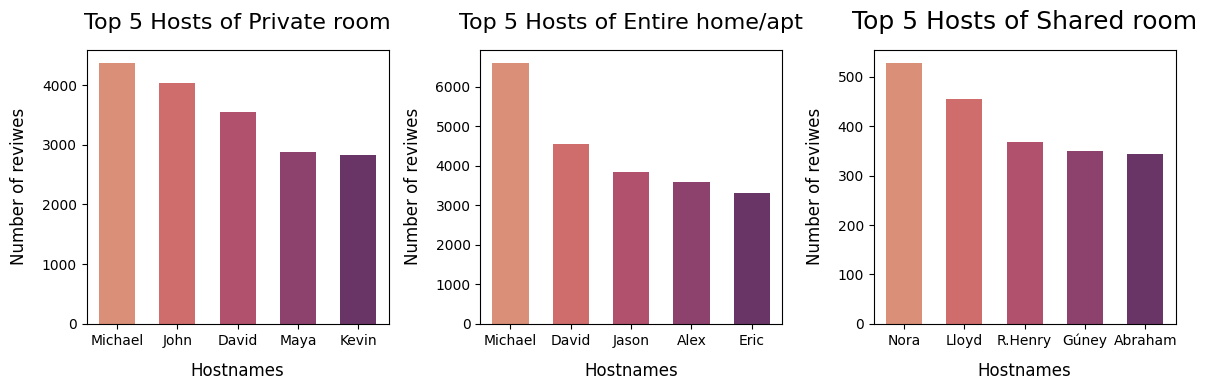

In [34]:
# Create three separate plots
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Plot 1
sns.barplot(data=top_hosts_roomtype_1,x='host_name',y='number_of_reviews',ax=axes[0],palette='flare',width=0.6)

#Adding labels and titles to plot1
axes[0].set_xlabel("Hostnames",fontsize=12,labelpad=10)
axes[0].set_ylabel("Number of reviwes",fontsize=12,labelpad=10)
axes[0].set_title('Top 5 Hosts of Private room',fontsize=16,pad=15)

# Plot 2
sns.barplot(data=top_hosts_roomtype_2,x='host_name',y='number_of_reviews',ax=axes[1],palette='flare',width=0.6)

#Adding labels and titles to plot1
axes[1].set_xlabel("Hostnames",fontsize=12,labelpad=10)
axes[1].set_ylabel("Number of reviwes",fontsize=12,labelpad=10)
axes[1].set_title('Top 5 Hosts of Entire home/apt',fontsize=16,pad=15)

# Plot 3
sns.barplot(data=top_hosts_roomtype_3,x='host_name',y='number_of_reviews',ax=axes[2],palette='flare',width=0.6)


#Adding labels and titles to plot1
axes[2].set_xlabel("Hostnames",fontsize=12,labelpad=10)
axes[2].set_ylabel("Number of reviwes",fontsize=12,labelpad=10)
axes[2].set_title('Top 5 Hosts of Shared room',fontsize=18,pad=15)

# Adjust spacing between plots
plt.tight_layout()

# Display the plots
plt.show()

### Observations

**Reasons**

Barplot is the effective way to visually represent and compare the numceric values across different variables.It gives a very quick visual comparison between total number of reviews wrt to different hosts.

**Insights**

Michael and David seems to be the popular hosts across two popular room type- Entire Room/Apartment and Private rooms, with respect to the customers reviews.

**Business Impact**

These top and popular host can be best for collaboration or even to understand factors like which room type and neighbourhood is popular among customers. Also as a competitor one can try understanding some best practices of top host to establish a successful business on AirBnB


# **Conclusion**


1.Airbnb offers wide range of accomadation types.
Majority of the listings of Airbnb are Entire Home/Apartment and Private room , while Entire Home being the first and Private room type being the second with very slight difference.And there are relatively very few lisiting for Shared room and seems least preferred.
This helps host understand the demand and competition for major types-Entire Home/Apartment and Private rooms is high in market

2.The average pricing of Entire room type is the highest across all neighbourhood groups.And pricing is higher in the center of Newyork city i.e., Manhattan compared to other regions.
This indicated that either investing in Entire Room type in any of the region or any property in Manhattan could gain more profits.If host can make huge investment, investing on Entire room in Manhattan is more profitable.

3.Manhattan and Brooklyn are the busiest and the most popular neighbourhood groups.This popularity explains the high pricing of listings in these neighbourhoods.

4.Brooklyn and Manhattan are very popular compared to other three neighbour groups. Brooklyn pricing is moderately expensive however it is the most popular neighbourhood.



